## ニューラルネットワークの学習
＊ **学習**とは訓練データから最適な重みパラメータの値を自動で獲得することを指す
* ニューラルネットワークではパラメータの値をデータから自動で取得できる

### データ駆動
* 特徴量を抽出する
* 画像処理の場合はベクトル

###

* 有名な特徴
* SIFT・SURF・HOG

### 損失関数

* 二乗誤差
$$E=\frac{1}{2}\sum_{k}(y_k-tk)^2$$

* 交差エントロピー
$$E=-\sum_{k}t_k\log{y_k}$$

### ミニバッチ学習
* 先程の交差エントロピーだと一つのデータを対象に考えている
* 最後のNで割ることで正規化していている。
* ミニバッチとは母集団から全体を無作為に何個か抽出して、ミニバッチ（小さな塊）で学習すること
$$E=-\frac{1}{N}\sum_{n}\sum_{k}t_{nk}\log{y_{nk}}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
#二乗誤差
y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.54, 0.2])
t = np.array([0, 0, 0, 1, 0, 0, 0, 0])

def mean_squared_error(y, t):
    return 0.5 * np.sum((y - t) ** 2)

print("yとtの二乗誤差:", mean_squared_error(y, t))

yとtの二乗誤差: 0.8583


In [3]:
#交差エントロピー

def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

cross_entropy_error(y, t)

16.11809565095832

In [4]:
os.chdir("/work/dl_learning/Mnist_data/dataset")

In [5]:
import mnist

In [6]:
(X_train, t_train), (X_test, t_test) = mnist.load_mnist()

In [7]:
print(X_train.shape, t_train.shape)

(60000, 784) (60000,)


In [8]:
train_size = X_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
X_batch = X_train[batch_mask]
t_batch = t_train[batch_mask]

In [9]:
def cross_entropy_erro(x, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [10]:
def cross_entropy_erro(x, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y[np.arange(batch_size)] + 1e-7)) / batch_size

### なぜ損失関数を設定するのか
* 認識精度を上げたいのに損失関数を導入するのは二度手間？
* 認識精度を指標にしたらどうか→微分を使用するとほとんどの場所で０になってしまう。（つまりパラメタの更新ができない）
* 認識精度を上げるためにパラメータの更新をする→ほとんど認識精度に変化は生じない（変わったとしても不連続な数値になる）
* 例としてステップ関数が上げられる。
* ステップ関数はほとんどの場所で微分した値が０になってしまう。→パラメータを更新しても抹殺されてしまう

### 数値微分
* 下記のコードにて数値微分を定義しているが、これには問題がある。
* 丸めの誤差が生じてしまう。（pythonだと小さすぎる値はビットの関係で表すことができない）
* 数値微分には誤差が生じてしまう。
* それを減らす方法として(x+h)と(x-h)での関数fの差分を計算することでごさを減らすことができる。これを**中心差分**という。

In [11]:
def numerical_diff(f, x):
    h = 10e-50
    return (f(x + h) - f(x)) / h

In [12]:
np.float32(1e-50)

0.0

In [13]:
def numerical_diff(f,x):
    h = 1e-4
    return (f(x + h) - f(x - h)) / (2 * h)

In [14]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

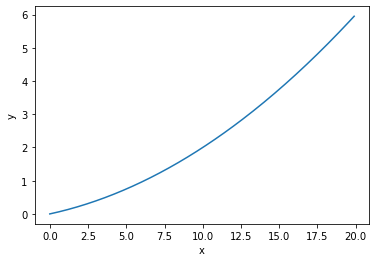

In [15]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, y)
plt.show()

In [16]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


In [17]:
def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

0.1999999999990898


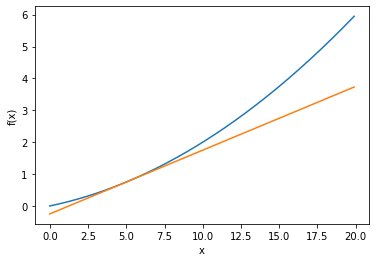

0.2999999999986347


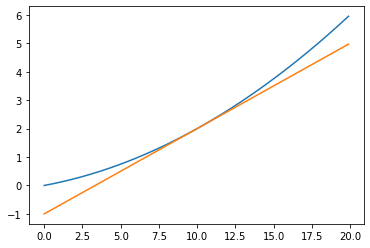

In [18]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf1 = tangent_line(function_1, 5)
y2 = tf1(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

tf2 = tangent_line(function_1, 10)
y2 = tf2(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

### 偏微分
* 変数が二つある関数がある。その関数に対してどの変数について区別を行う必要がある。
* 下記のコードでは次の式を使用して偏微分を行う。
* 例えばx0に対して微分をする際はそれ以外の変数(今回はx1)を定数とみなして処理する。
$$f(x_0, x_1)=x_0^{2}+x_1^{2}$$

In [19]:
def function_2(x):
    return np.sum(x ** 2)

In [20]:
def function_tmp1(x0):#x0に対して微分
    return x0*x0 + 4.0**2
print(numerical_diff(function_tmp1, 3.0))

def function_tmp2(x1):#x1に対して微分
    return 3.0**2.0 + x1*x1
print(numerical_diff(function_tmp2, 4.0))

6.00000000000378
7.999999999999119


### 勾配
* x0, x1の変数をまとめて微分したい
* 全ての変数の偏微分をベクトルとしてまとめたものを勾配と呼ぶ。
* 勾配が示す方向は各場所において関数の値を最も減らす方向

### 勾配法
* 機械学習においての問題として、最適なパラメータを探すこと
* 最適なパラメータとは損失関数が最小値をとる値である。
* 極値と呼ばれる局所的な最適解に陥ることもある→そこが必ずしも最小値とは限らない

#### 学習率
* η（イータ）と呼ばれる値で、更新の量を表す
* どれだけ学習を進めるかという値
* この様な学習率の様なパラメータのことを**ハイパーパラメータ**と呼ぶ

In [21]:
def _numerical_gradient_no_batch(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x) # xと形状が同じで値が全て0の配列

    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)  # f(x+h)

        x[idx] = tmp_val - h
        fxh2 = f(x)  # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)

        x[idx] = tmp_val  # 値を元に戻す
    return grad

# バッチ処理
def numerical_gradient(f, X):
    
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)

    for idx, x in enumerate(X):
        grad[idx] = _numerical_gradient_no_batch(f, x)

    return grad

In [22]:
print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


In [23]:
def gradient_descent(f, inin_x, lr=0.01, step_num=100):
    x = init_x
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

In [24]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, inin_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [25]:
print(gradient_descent(function_2, inin_x=init_x, lr=10.0, step_num=100))#学習率が大きすぎる場合
print(gradient_descent(function_2, inin_x=init_x, lr=1e-10, step_num=100))#学習率が小さすぎる場合

[ 2.34235971e+12 -3.96091057e+12]
[ 2.34235971e+12 -3.96091057e+12]


In [27]:
os.chdir("/work/dl_learning/deep-learning-from-scratch-master/ch04")

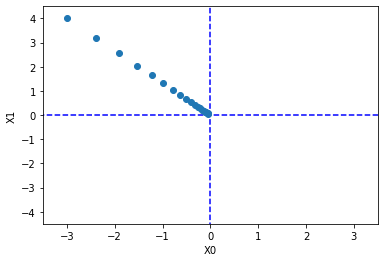

In [28]:
from gradient_2d import numerical_gradient


def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

In [29]:
os.chdir("/work/dl_learning/deep-learning-from-scratch-master/common")
print(os.getcwd())

/work/dl_learning/deep-learning-from-scratch-master/common


In [30]:
import functions 
import gradient

In [31]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)
    def predict(self, x):
        return np.dot(x, self.W)
    def loss(self, x, t):
        z = self.predict(x)
        y = functions.softmax(z)
        loss = functions.cross_entropy_error(y, t)
        return loss

In [32]:
net = simpleNet()
print(net.W)

[[ 8.23618607e-01 -9.81036774e-01 -9.61550955e-01]
 [ 1.94714858e-01  7.99310301e-04 -6.67064572e-01]]


In [33]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)
print(np.argmax(p))

[ 0.66941454 -0.58790268 -1.17728869]
0


In [34]:
t = np.array([0, 0, 1])
net.loss(x, t)

2.212852915839132

In [35]:
def f(W):
    return net.loss(x, t)

numerical_gradient(f, net.W)

array([[ 0.41603864,  0.11832806, -0.53436669],
       [ 0.62405796,  0.17749209, -0.80155004]])

In [36]:
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.41603864  0.11832806 -0.53436669]
 [ 0.62405796  0.17749209 -0.80155004]]


### 学習アルゴリズムの実装
* 流れ（以下の流れを**確率的勾配降下法（SGD）**と呼ぶ）
##### ミニバッチ
* 訓練データからランダムに一部のデータ抜き出す
##### 勾配の算出
* ミニバッチの損失関数を減らすために勾配を求める
##### パラメータの更新
* 重みパラメータを勾配方向に日精霊だけ更新する
##### 繰り返す
* 上記のステップを繰り返す


In [37]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params["W1"] = weight_init_std * \
                            np.random.randn(input_size, hidden_size)
        self.params["b1"] = np.zeros(hidden_size)
        self.params["W2"] = weight_init_std * \
                            np.random.randn(hidden_size, output_size)
        self.params["b2"] = np.zeros(output_size)
        
    def predict(self, x):
        W1, W2 = self.params["W1"], self.params["W2"]
        b1, b2 = self.params["b1"], self.params["b2"]
        
        a1 = np.dot(x, W1) + b1
        z1 = functions.sigmoid(a1)
        a2 = np.dot(z1, W2)
        y = functions.softmax(a2)
        
        return y
    
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t)
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        grads = {}
        
        grads["W1"] = numerical_gradient(loss_W, self.params["W1"])
        grads["b1"] = numerical_gradient(loss_W, self.params["b1"])        
        grads["W2"] = numerical_gradient(loss_W, self.params["W2"])        
        grads["b2"] = numerical_gradient(loss_W, self.params["b2"])        
        
        return grads

In [38]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params["W1"].shape)
print(net.params["b1"].shape)
print(net.params["W2"].shape)
print(net.params["b2"].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [39]:
x = np.random.rand(100, 784)
y = net.predict(x)

x = np.random.rand(100, 784)
t = np.random.rand(100, 10)

In [40]:
grads = net.numerical_gradient(x, t)
print(grads["W1"].shape)
print(grads["b1"].shape)
print(grads["W2"].shape)
print(grads["b2"].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [41]:
os.chdir("/work/dl_learning/Mnist_data/dataset")
print(os.getcwd())
import mnist
os.chdir("/work/dl_learning/deep-learning-from-scratch-master/ch04")
print(os.getcwd())
import two_layer_net

/work/dl_learning/Mnist_data/dataset
/work/dl_learning/deep-learning-from-scratch-master/ch04


In [42]:
(X_train, t_train), (X_test, t_test) = mnist.load_mnist(one_hot_label=True)
train_loss_list = []

iters_num = 10000
train_size = X_train.shape[0]
batch_size = 100
learning_rate = 0.1
network = two_layer_net.TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [43]:
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    X_batch = X_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grad = network.gradient(X_batch, t_batch)
    
    for key in ("W1", "b1", "W2", "b2"):
        network.params[key] -= learning_rate * grad[key]
        
    loss = network.loss(X_batch, t_batch)
    train_loss_list.append(loss)

In [44]:
(X_train, t_train), (X_test, t_test) = mnist.load_mnist(one_hot_label=True)

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

iters_num = 10000
batch_size = 100
learning_rate = 0.1

In [45]:
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    X_batch = X_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grad = network.gradient(X_batch, t_batch)
    
    for key in ("W1", "b1", "W2", "b2"):
        network.params[key] -= learning_rate * grad[key]
        
    loss = network.loss(X_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(X_train, t_train)
        test_acc = network.accuracy(X_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

train acc, test acc | 0.9487833333333333, 0.9463
train acc, test acc | 0.9493, 0.9479
train acc, test acc | 0.9513833333333334, 0.9498
train acc, test acc | 0.95285, 0.95
train acc, test acc | 0.9537, 0.9513
train acc, test acc | 0.9553333333333334, 0.9531
train acc, test acc | 0.9562833333333334, 0.9535
train acc, test acc | 0.95755, 0.955
train acc, test acc | 0.9579666666666666, 0.9548
train acc, test acc | 0.9591166666666666, 0.9561
train acc, test acc | 0.9600166666666666, 0.9566
train acc, test acc | 0.9613666666666667, 0.9576
train acc, test acc | 0.9614333333333334, 0.9574
train acc, test acc | 0.9628166666666667, 0.9593
train acc, test acc | 0.9634833333333334, 0.9598
train acc, test acc | 0.96405, 0.9604
train acc, test acc | 0.9650166666666666, 0.9607
